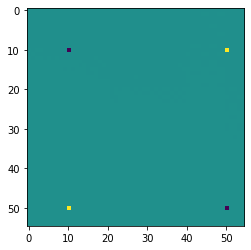

In [5]:
from pykrige.uk import UniversalKriging
import numpy as np
import matplotlib.pyplot as plt

data = np.array(
    [
        [1, 1, 0],
        [1, 5, 1],
        [5, 1, 1],
        [5, 5, 0],
    ]
)

gridx = np.arange(0.0, 5.5, 0.1)
gridy = np.arange(0.0, 5.5, 0.1)

# Creates kriged grid and the variance grid
UK = UniversalKriging(
    data[:, 0],
    data[:, 1],
    data[:, 2],
    variogram_model="linear",
    drift_terms=["regional_linear"],
)

#plt.plot(data[:, 0], data[:, 1], 'ro')
#plt.axis([0, 10, 10, 0])
#plt.show()

z, ss = UK.execute("grid", gridx, gridy)
plt.imshow(z)
plt.show()

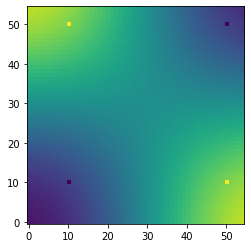

In [6]:
import gstools as gs
from pykrige.ok import OrdinaryKriging

# a GSTools based covariance model
cov_model = gs.Gaussian(dim=2, len_scale=4, anis=1, angles=0.5, var=0.5, nugget=0.1)

# ordinary kriging with pykrige
OK1 = OrdinaryKriging(data[:, 0], data[:, 1], data[:, 2], cov_model)
z1, ss1 = OK1.execute("grid", gridx, gridy)
plt.imshow(z1, origin="lower")
plt.show()